In [1]:
from utils.load_results import *
from utils.plot_helpers import *

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
plt.style.use('default')

In [2]:
datasets = ['(3,4)', '(3,8)', '(3,16)', '(4,4)', '(4,8)', '(5,4)']
n_values = [4, 8, 16, 4, 8, 4]
n_attributes = [3, 3, 3, 4, 4, 5]
n_epochs = 300
n_datasets = len(datasets)
paths = ['results/' + d + '_game_size_10_vsf_3' for d in datasets]

## training

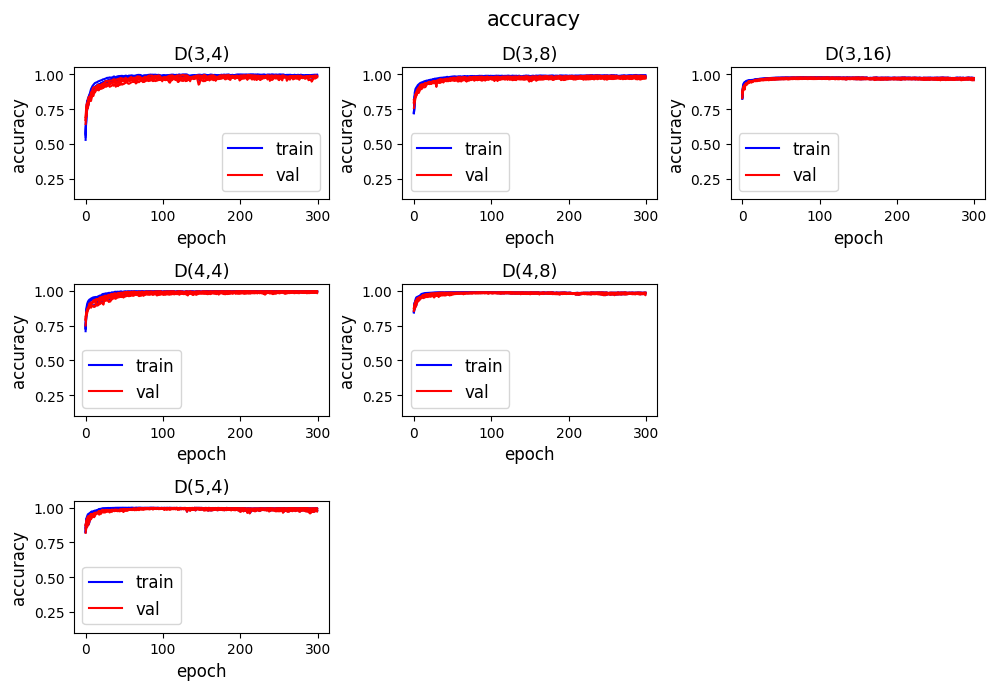

In [3]:
all_accuracies = load_accuracies(paths, n_runs=5, n_epochs=300, val_steps=1, zero_shot=True, context_unaware=False, length_cost=False)
plot_training_trajectory(all_accuracies['zs_specific_train_acc'], all_accuracies['zs_specific_val_acc'], ylim=(0.1, 1.05), steps=(1, 1))

## final accuracies 
### training and validation accuracies

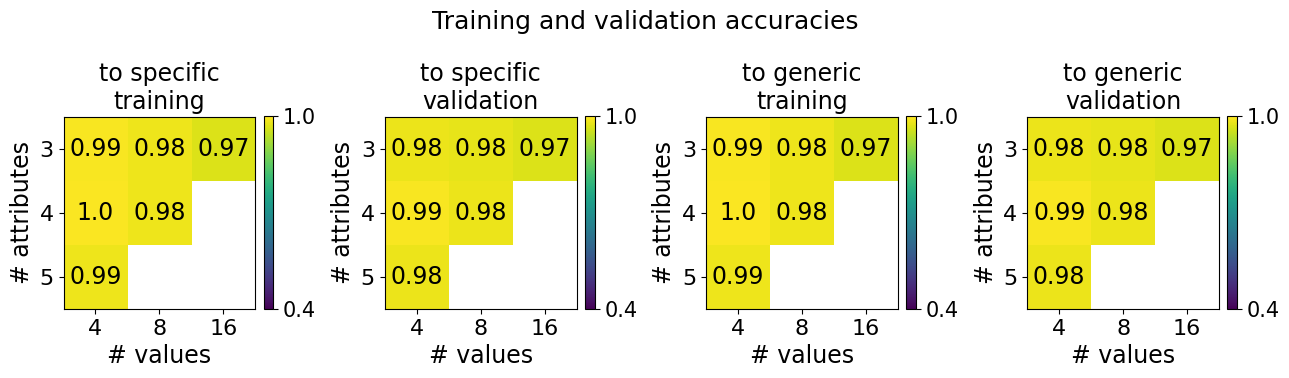

In [58]:
accuracies = [all_accuracies['zs_specific_train_acc'], all_accuracies['zs_specific_val_acc'],
              all_accuracies['zs_generic_train_acc'], all_accuracies['zs_generic_val_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,4), ylims=(0.4, 1.0), figsize=(13, 3.5), suptitle='Training and validation accuracies', 
             titles=('to specific\ntraining', 'to specific\nvalidation', 'to generic\ntraining', 'to generic\nvalidation'),
             fontsize=17)

In [78]:
# Convert the list to a NumPy array
acc_array = np.array(accuracies)

# Compute means and standard deviations over the five runs using the final accuracy at epoch 300
final_accs = acc_array[:,:,:,-1]
means = np.mean(final_accs, axis=2)
std_devs = np.std(final_accs, axis=2)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["to specific training", "to specific validation", "to generic training", "to generic validation"]

# Prepare the data for the DataFrames
data1 = []
data2 = []

# iterate over datasets
for i in range(means.shape[1]):
    row1 = []
    row2 = []
    # iterate over conditions
    for j in range(means.shape[0]):
        formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        if j < 2:
            row1.append(formatted_value)
        else:
            row2.append(formatted_value)
    data1.append(row1)
    data2.append(row2)

# Create DataFrames
df_1 = pd.DataFrame(data1, index=row_names, columns=col_names[:2])
df_2 = pd.DataFrame(data2, index=row_names, columns=col_names[2:])

# Convert DataFrames to LaTeX tables
latex_table_1 = df_1.to_latex(index=True, escape=False)
latex_table_2 = df_2.to_latex(index=True, escape=False)

print("To specific:")
print(latex_table_1)
print("\nTo generic:")
print(latex_table_2)


To specific:
\begin{tabular}{lll}
\toprule
{} & to specific training & to specific validation \\
\midrule
D(3,4)  &      0.99 $\pm$ 0.00 &        0.98 $\pm$ 0.00 \\
D(3,8)  &      0.98 $\pm$ 0.01 &        0.98 $\pm$ 0.01 \\
D(3,16) &      0.97 $\pm$ 0.01 &        0.97 $\pm$ 0.01 \\
D(4,4)  &      1.00 $\pm$ 0.00 &        0.99 $\pm$ 0.00 \\
D(4,8)  &      0.98 $\pm$ 0.00 &        0.98 $\pm$ 0.01 \\
D(5,4)  &      0.99 $\pm$ 0.01 &        0.98 $\pm$ 0.01 \\
\bottomrule
\end{tabular}


To generic:
\begin{tabular}{lll}
\toprule
{} & to generic training & to generic validation \\
\midrule
D(3,4)  &     0.99 $\pm$ 0.00 &       0.98 $\pm$ 0.00 \\
D(3,8)  &     0.98 $\pm$ 0.01 &       0.98 $\pm$ 0.01 \\
D(3,16) &     0.97 $\pm$ 0.01 &       0.97 $\pm$ 0.01 \\
D(4,4)  &     1.00 $\pm$ 0.00 &       0.99 $\pm$ 0.00 \\
D(4,8)  &     0.98 $\pm$ 0.00 &       0.98 $\pm$ 0.01 \\
D(5,4)  &     0.99 $\pm$ 0.01 &       0.98 $\pm$ 0.01 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_15567/2418438258.py:36: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table_1 = df_1.to_latex(index=True, escape=False)
/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_15567/2418438258.py:37: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table_2 = df_2.to_latex(index=True, escape=False)


### zero-shot test accuracies

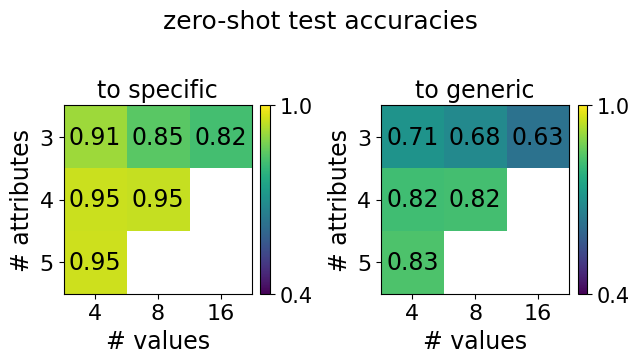

In [85]:
accuracies = [all_accuracies['zs_specific_test_acc'], all_accuracies['zs_generic_test_acc']]
plot_heatmap(accuracies, 'mean', plot_dims=(1,2), ylims=(0.4, 1.0), figsize=(6.5, 3.5), suptitle='zero-shot test accuracies', 
             titles=('to specific', 'to generic'),
             fontsize=17)

In [86]:
# Convert the list to a NumPy array
acc_array = np.array(accuracies)

# Compute means and standard deviations over the five runs
means = np.mean(acc_array, axis=-1)
std_devs = np.std(acc_array, axis=-1)

# Row names and column names
row_names = ["D(3,4)", "D(3,8)", "D(3,16)", "D(4,4)", "D(4,8)", "D(5,4)"]
col_names = ["to specific", "to generic"]

# Prepare the data for the DataFrames
data = []

# iterate over datasets
for i in range(means.shape[1]):
    row = []
    # iterate over conditions
    for j in range(means.shape[0]):
        formatted_value = f"{means[j, i]:.2f} $\\pm$ {std_devs[j, i]:.2f}"
        row.append(formatted_value)
    data.append(row)

# Create DataFrames
df = pd.DataFrame(data, index=row_names, columns=col_names)

# Convert DataFrames to LaTeX tables
latex_table = df.to_latex(index=True, escape=False)

print(latex_table)


\begin{tabular}{lll}
\toprule
{} &      to specific &       to generic \\
\midrule
D(3,4)  &  0.91 $\pm$ 0.02 &  0.71 $\pm$ 0.04 \\
D(3,8)  &  0.85 $\pm$ 0.01 &  0.68 $\pm$ 0.05 \\
D(3,16) &  0.82 $\pm$ 0.03 &  0.63 $\pm$ 0.03 \\
D(4,4)  &  0.95 $\pm$ 0.00 &  0.82 $\pm$ 0.04 \\
D(4,8)  &  0.95 $\pm$ 0.01 &  0.82 $\pm$ 0.07 \\
D(5,4)  &  0.95 $\pm$ 0.01 &  0.83 $\pm$ 0.06 \\
\bottomrule
\end{tabular}


/var/folders/k6/03rlh8jd6nqbws0_xg9jh20w0000gq/T/ipykernel_15567/1475190353.py:28: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = df.to_latex(index=True, escape=False)
